# County Features 

We tried using the ACS 1 year data through Cenpy and the API and consistently got ~820 to 840 counties. 

I tried it from the API directly and from cenpy, with different years for each, and it always returned counties within that range. And, not all states had counties in there, so it wasn't a random sample (remember, Arizona had zero...) 

#### However, using the 5 year data does get us more county information! 

In [1]:
import pandas as pd
import cenpy as c
#find table that we want to query 
available = c.explorer.available()
acs_df = available[available['title'].str.contains('ACS') == True]
acs_df = acs_df[acs_df['vintage'] == 2017]
acs_df

/anaconda3/envs/learn-env/lib/python3.6/site-packages/libpysal/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


,title,temporal,spatial,publisher,programCode,modified,keyword,distribution,description,contactPoint,...,c_isTimeseries,c_isCube,c_isAvailable,c_isAggregate,c_groupsLink,c_geographyLink,c_examplesLink,c_dataset,bureauCode,accessLevel
ACSDP5Y2017,ACS 5-Year Data Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-19 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs5/prof...,https://api.census.gov/data/2017/acs/acs5/prof...,https://api.census.gov/data/2017/acs/acs5/prof...,"(acs, acs5, profile)",NaN,NaN
ACSCP5Y2017,ACS 5-Year Comparison Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-19 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs5/cpro...,https://api.census.gov/data/2017/acs/acs5/cpro...,https://api.census.gov/data/2017/acs/acs5/cpro...,"(acs, acs5, cprofile)",NaN,NaN
ACSDP1Y2017,ACS 1-Year Data Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs1/prof...,https://api.census.gov/data/2017/acs/acs1/prof...,https://api.census.gov/data/2017/acs/acs1/prof...,"(acs, acs1, profile)",NaN,NaN
ACSCP1Y2017,ACS 1-Year Comparison Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs1/cpro...,https://api.census.gov/data/2017/acs/acs1/cpro...,https://api.census.gov/data/2017/acs/acs1/cpro...,"(acs, acs1, cprofile)",NaN,NaN
ACSST5Y2017,ACS 5-Year Subject Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-19 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs5/subj...,https://api.census.gov/data/2017/acs/acs5/subj...,https://api.census.gov/data/2017/acs/acs5/subj...,"(acs, acs5, subject)",NaN,NaN
ACSDT1Y2017,ACS 1-Year Detailed Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs1/grou...,https://api.census.gov/data/2017/acs/acs1/geog...,https://api.census.gov/data/2017/acs/acs1/exam...,"(acs, acs1)",NaN,NaN
ACSSE2017,ACS 1-Year Supplemental Estimates,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-18 00:00:00.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is a natio...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acsse/gro...,https://api.census.gov/data/2017/acs/acsse/geo...,https://api.census.gov/data/2017/acs/acsse/exa...,"(acs, acsse)",NaN,NaN
ACSDT5Y2017,ACS 5-Year Detailed Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-08-21 07:11:43.0,NaN,"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,"{'fn': 'American Community Survey Office', 'ha...",...,NaN,True,True,True,https://api.census.gov/data/2017/acs/acs5/grou...,https://api.census.gov/data/2017/acs/acs5/geog...,https://api.census.gov/data/2017/acs/acs5/exam...,"(acs, acs5)",NaN,NaN
ACSSPP1Y2017,ACS 1-Year Selected Population Pr

Based on this website and other research, we want to use ACSDP5Y2017.

In [2]:
c.explorer.explain('ACSDP5Y2017')

{'ACS 5-Year Data Profiles': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. The data profiles include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. Data profiles contain broad social, economic, housing, and demographic information. The data are presented as both counts and percentages. There are over 2,400 variables in this dataset.'}

In [3]:
con = c.base.Connection('ACSDP5Y2017')
g_unit = 'county:*'

In [4]:
#create education features list from https://api.census.gov/data/2017/acs/acs5/profile/variables.html
cols_edu = [] 
for n in range(52,68): 
    var_name = 'DP02_00'+str(n)+'PE'
    cols_edu.append(var_name)

#create internet features list
cols_internet = []
for n in range(150,153):
    var_name = 'DP02_0'+str(n)+'PE'
    cols_internet.append(var_name)

#create row names for joining and EDA
cols_req = ['NAME']


In [5]:
cols = cols_req + cols_edu + cols_internet 

In [6]:
counties_df = con.query(cols=cols, geo_unit=g_unit)
counties_df.head()

,NAME,DP02_0052PE,DP02_0053PE,DP02_0054PE,DP02_0055PE,DP02_0056PE,DP02_0057PE,DP02_0058PE,DP02_0059PE,DP02_0060PE,...,DP02_0063PE,DP02_0064PE,DP02_0065PE,DP02_0066PE,DP02_0067PE,DP02_0150PE,DP02_0151PE,DP02_0152PE,state,county
0,"Pickens County, Alabama",4416,11.8,5.7,39.2,26.8,16.5,14241,6.2,13.9,...,7.5,8.8,3.0,79.8,11.8,7620,71.0,60.9,01,107
1,"Sumter County, Alabama",4106,4.4,5.9,26.9,18.8,44.1,8244,4.7,12.6,...,7.0,10.6,7.6,82.7,18.2,5073,64.8,50.4,01,119
2,"Jefferson County, Alabama",165739,6.8,5.7,39.9,20.5,27.1,447048,3.0,7.6,...,8.1,19.4,12.5,89.4,31.9,261390,84.4,73.0,01,073
3,"Choctaw County, Alabama",2718,3.9,4.3,48.0,24.4,19.4,9449,6.6,13.3,...,9.1,7.9,3.8,80.1,11.6,5463,70.4,52.3,01,023
4,"Franklin County, Alabama",7426,3.3,6.8,49.2,23.3,17.4,20734,11.8,11.9,...,7.5,8.3,5.1,76.4,13.4,11533,74.2,60.3,01,059


In [7]:
counties_df = counties_df.rename(index=str, columns={'NAME': 'county_name', 
                                       'DP02_0052PE': '%_inschool_3+',
                                       'DP02_0053PE': '%_preschool_3+',
                                       'DP02_0054PE': '%_kinderg_3+',
                                       'DP02_0055PE': '%_elementary_3+',
                                       'DP02_0056PE': '%_highschool_3+',
                                       'DP02_0057PE': '%_college_3+',
                                       'DP02_0058PE': '%_25+',
                                       'DP02_0059PE': '%_below9th_25+',
                                       'DP02_0060PE': '%_9th-12th_25+',
                                       'DP02_0061PE': '%_hsgrad_25+',
                                       'DP02_0062PE': '%_somecollege_25+',
                                       'DP02_0063PE': '%_associates_25+',
                                       'DP02_0064PE': '%_bachelors_b25+',
                                       'DP02_0065PE': '%_gradschool_25+',
                                       'DP02_0066PE': '%_hsgrad_or+_25+',
                                       'DP02_0067PE': '%_bachelors_or+_25+',
                                       'DP02_0150PE': '%_useinternet_total_households',
                                       'DP02_0151PE': '%_havecomp_total_households',
                                       'DP02_0152PE': '%_broadband_total_households',
                                      })

In [8]:
counties_df[counties_df['county_name'].str.contains('Wyoming')]

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_associates_25+,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county
1857,"Wyoming County, New York",7920,5.7,4.3,46.4,25.3,18.3,29320,3.5,8.2,...,13.4,9.7,5.8,88.3,15.4,15686,83.8,73.1,36,121
2267,"Wyoming County, Pennsylvania",5697,5.8,4.8,42.4,25.4,21.6,19657,1.8,6.1,...,8.5,12.4,6.5,92.1,18.8,10801,84.7,78.6,42,131
2966,"Wyoming County, West Virginia",4207,6.6,7.6,49.3,24.6,11.9,15859,8.5,13.1,...,4.1,5.4,3.9,78.4,9.3,9169,71.8,63.6,54,109
3047,"Goshen County, Wyoming",2938,5.4,3.2,42.1,24.1,25.3,9449,2.0,6.6,...,11.0,15.3,9.1,91.4,24.4,5328,81.9,71.3,56,015
3048,"Uinta County, Wyoming",5557,6.8,6.3,53.9,21.6,11.5,12978,2.3,5.9,...,10.3,11.9,5.5,91.8,17.4,7705,91.2,83.8,56,041
3049,"Washakie County, Wyoming",1783,4.7,2.5,52.7,33.5,6.7,5705,2.9,8.6,...,11.3,15.4,5.6,88.5,21.0,3490,87.7,76.4,56,043
3050,"Hot Springs County, Wyoming",943,10.0,6.0,49.9,19.3,14.7,3604,1.2,6.2,...,14.1,13.3,8.3,92.5,21.6,2246,85.1,74.4,56,017
3051,"Fremont County, Wyoming",10169,9.1,5.7,45.1,21.1,19.0,26781,2.1,6.8,...,10.6,15.5,7.7,91.1,23.3,15167,86.1,71.9,56,013
3052,"Sublette County, Wyoming",2482,6.8,7.7,49.4,21.5,14.6,7051,1.6,2.1,...,9.2,19.2,6.2,96.2,25.4,3197,93.9,82.9,56,035
3053,"Weston County, Wyoming",1441,13.4,2.7,46.2,19.4,18.3,5074,1.5,6.6,...,9.1,14.1,5.7,91.9,19.8,3182,82.9,71.1,56,045


In [9]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 22 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null object
%_preschool_3+                    3142 non-null object
%_kinderg_3+                      3142 non-null object
%_elementary_3+                   3142 non-null object
%_highschool_3+                   3142 non-null object
%_college_3+                      3142 non-null object
%_25+                             3142 non-null object
%_below9th_25+                    3142 non-null object
%_9th-12th_25+                    3142 non-null object
%_hsgrad_25+                      3142 non-null object
%_somecollege_25+                 3142 non-null object
%_associates_25+                  3142 non-null object
%_bachelors_b25+                  3142 non-null object
%_gradschool_25+                  3142 non-null object
%_hsgrad_or+_25+                  3142 non-null object
%_bachelors_or+_25

In [10]:
counties_df['county_code'] = counties_df['state'] + counties_df['county']

counties_df.head()

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
0,"Pickens County, Alabama",4416,11.8,5.7,39.2,26.8,16.5,14241,6.2,13.9,...,8.8,3.0,79.8,11.8,7620,71.0,60.9,01,107,01107
1,"Sumter County, Alabama",4106,4.4,5.9,26.9,18.8,44.1,8244,4.7,12.6,...,10.6,7.6,82.7,18.2,5073,64.8,50.4,01,119,01119
2,"Jefferson County, Alabama",165739,6.8,5.7,39.9,20.5,27.1,447048,3.0,7.6,...,19.4,12.5,89.4,31.9,261390,84.4,73.0,01,073,01073
3,"Choctaw County, Alabama",2718,3.9,4.3,48.0,24.4,19.4,9449,6.6,13.3,...,7.9,3.8,80.1,11.6,5463,70.4,52.3,01,023,01023
4,"Franklin County, Alabama",7426,3.3,6.8,49.2,23.3,17.4,20734,11.8,11.9,...,8.3,5.1,76.4,13.4,11533,74.2,60.3,01,059,01059


In [11]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 23 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null object
%_preschool_3+                    3142 non-null object
%_kinderg_3+                      3142 non-null object
%_elementary_3+                   3142 non-null object
%_highschool_3+                   3142 non-null object
%_college_3+                      3142 non-null object
%_25+                             3142 non-null object
%_below9th_25+                    3142 non-null object
%_9th-12th_25+                    3142 non-null object
%_hsgrad_25+                      3142 non-null object
%_somecollege_25+                 3142 non-null object
%_associates_25+                  3142 non-null object
%_bachelors_b25+                  3142 non-null object
%_gradschool_25+                  3142 non-null object
%_hsgrad_or+_25+                  3142 non-null object
%_bachelors_or+_25

In [12]:
counties_df['county_code'] = counties_df['county_code'].astype(int)
counties_df['state'] = counties_df['state'].astype(int)
counties_df['county'] = counties_df['county'].astype(int)
counties_df.iloc[:,1:-3] = counties_df.iloc[:,1:-3].astype(float)
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 23 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null float64
%_preschool_3+                    3142 non-null float64
%_kinderg_3+                      3142 non-null float64
%_elementary_3+                   3142 non-null float64
%_highschool_3+                   3142 non-null float64
%_college_3+                      3142 non-null float64
%_25+                             3142 non-null float64
%_below9th_25+                    3142 non-null float64
%_9th-12th_25+                    3142 non-null float64
%_hsgrad_25+                      3142 non-null float64
%_somecollege_25+                 3142 non-null float64
%_associates_25+                  3142 non-null float64
%_bachelors_b25+                  3142 non-null float64
%_gradschool_25+                  3142 non-null float64
%_hsgrad_or+_25+                  3142 non-null float64
%_b

In [13]:
counties_df[pd.isnull(counties_df).any(axis=1)]

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
3142,"Jayuya Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,73,72073
3143,"Quebradillas Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,115,72115
3144,"Guayama Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,57,72057
3145,"Guánica Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,55,72055
3146,"Rincón Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,117,72117
3147,"Villalba Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,149,72149
3148,"Aguas Buenas Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,7,72007
3149,"Bayamón Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,21,72021
3150,"Hormigueros Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,67,72067
3151,"Manatí Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,91,72091


In [14]:
counties_df = counties_df.dropna()
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 0 to 3141
Data columns (total 23 columns):
county_name                       3142 non-null object
%_inschool_3+                     3142 non-null float64
%_preschool_3+                    3142 non-null float64
%_kinderg_3+                      3142 non-null float64
%_elementary_3+                   3142 non-null float64
%_highschool_3+                   3142 non-null float64
%_college_3+                      3142 non-null float64
%_25+                             3142 non-null float64
%_below9th_25+                    3142 non-null float64
%_9th-12th_25+                    3142 non-null float64
%_hsgrad_25+                      3142 non-null float64
%_somecollege_25+                 3142 non-null float64
%_associates_25+                  3142 non-null float64
%_bachelors_b25+                  3142 non-null float64
%_gradschool_25+                  3142 non-null float64
%_hsgrad_or+_25+                  3142 non-null float64
%_b

In [15]:
counties_df.tail().T

,3137,3138,3139,3140,3141
county_name,"Rusk County, Wisconsin","Vilas County, Wisconsin","Shawano County, Wisconsin","Juneau County, Wisconsin","Washington County, Wisconsin"
%_inschool_3+,2690,3495,8769,5183,31410
%_preschool_3+,6.4,6.7,6.5,4.8,5.8
%_kinderg_3+,3.8,5.8,5.7,7.2,5.5
%_elementary_3+,53.5,46.2,46.4,46.5,44.6
%_highschool_3+,25.1,23.1,24.3,25.9,24.4
%_college_3+,11.1,18.1,17,15.6,19.8
%_25+,10268,16692,29299,19276,93734
%_below9th_25+,4.8,1,2.5,3.6,1.8
%_9th-12th_25+,8.2,6.4,6.5,9.4,3.8


# Overdoses by County

In [16]:
od = pd.read_csv('2013-2017 Overdose Information.txt', delimiter='\t')
od = od.drop(['Notes'], axis=1)

od_reliable = od.drop(od[od['Crude Rate']=='Suppressed'].index)

od_reliable = od_reliable.drop(od_reliable[od_reliable['Crude Rate']=='Unreliable'].index)
od_reliable = od_reliable.drop(od_reliable[od_reliable['Deaths']=='Missing'].index)
od_reliable = od_reliable.drop(od_reliable[od_reliable['Deaths'].isna()].index)
od_reliable = od_reliable.drop(od_reliable[od_reliable['County Code'].isna()].index)
od_reliable.head()

,County,County Code,Deaths,Population,Crude Rate,% of Total Deaths
0,"Autauga County, AL",1001.0,47,276908,16.9731,0.0103%
1,"Baldwin County, AL",1003.0,253,1020551,24.7905,0.0554%
3,"Bibb County, AL",1007.0,27,112912,23.9124,0.0059%
4,"Blount County, AL",1009.0,88,288981,30.4518,0.0193%
7,"Calhoun County, AL",1015.0,132,577611,22.8528,0.0289%


In [17]:
od_reliable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null float64
Deaths               2016 non-null object
Population           2016 non-null object
Crude Rate           2016 non-null object
% of Total Deaths    2016 non-null object
dtypes: float64(1), object(5)
memory usage: 110.2+ KB


In [18]:
od_reliable['County Code'] = od_reliable['County Code'].astype(int)
od_reliable['Deaths'] = od_reliable['Deaths'].astype(int)
od_reliable['Population'] = od_reliable['Population'].astype(int)
od_reliable['Crude Rate'] = od_reliable['Crude Rate'].astype(float)

In [19]:
od_reliable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null int64
Deaths               2016 non-null int64
Population           2016 non-null int64
Crude Rate           2016 non-null float64
% of Total Deaths    2016 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 110.2+ KB


In [20]:
od_reliable['% of Total Deaths'] = od_reliable['% of Total Deaths'].str.replace("%", "")
od_reliable['% of Total Deaths'] = od_reliable['% of Total Deaths'].astype(float)

In [21]:
od_df = od_reliable

In [22]:
od_df.head()

,County,County Code,Deaths,Population,Crude Rate,% of Total Deaths
0,"Autauga County, AL",1001,47,276908,16.9731,0.0103
1,"Baldwin County, AL",1003,253,1020551,24.7905,0.0554
3,"Bibb County, AL",1007,27,112912,23.9124,0.0059
4,"Blount County, AL",1009,88,288981,30.4518,0.0193
7,"Calhoun County, AL",1015,132,577611,22.8528,0.0289


In [23]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null int64
Deaths               2016 non-null int64
Population           2016 non-null int64
Crude Rate           2016 non-null float64
% of Total Deaths    2016 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 110.2+ KB


# Joining the CDC and Census Data

In [24]:
counties_data = od_df.merge(counties_df, how='inner', left_on='County Code', right_on='county_code')

In [25]:
counties_data.drop(['County Code', 'county_name'], axis=1, inplace=True)

In [26]:
counties_data

,County,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
0,"Autauga County, AL",47,276908,16.9731,0.0103,13438.0,3.9,7.1,46.3,24.8,...,14.5,10.5,87.7,25.0,21054.0,86.2,76.6,1,1,1001
1,"Baldwin County, AL",253,1020551,24.7905,0.0554,44265.0,6.2,4.9,46.5,24.3,...,20.4,10.3,90.2,30.7,76133.0,86.9,74.5,1,3,1003
2,"Bibb County, AL",27,112912,23.9124,0.0059,4626.0,3.0,4.9,44.0,28.7,...,8.1,5.1,82.1,13.2,6916.0,74.8,62.0,1,7,1007
3,"Blount County, AL",88,288981,30.4518,0.0193,12428.0,3.9,4.4,49.3,25.9,...,8.7,4.4,79.8,13.1,20690.0,78.2,65.8,1,9,1009
4,"Calhoun County, AL",132,577611,22.8528,0.0289,27798.0,6.2,5.3,41.4,20.6,...,10.2,7.6,83.2,17.9,45099.0,82.9,71.0,1,15,1015
5,"Chambers County, AL",34,169917,20.0098,0.0074,7081.0,5.6,3.3,48.2,21.5,...,9.0,4.3,80.9,13.3,13694.0,72.7,62.8,1,17,1017
6,"Cherokee County, AL",40,129681,30.8449,0.0088,5109.0,3.8,4.9,47.8,27.6,...,6.6,5.9,79.5,12.5,10795.0,79.4,67.5,1,19,1019
7,"Chilton County, AL",42,219833,19.1054,0.0092,9659.0,4.9,7.2,48.6,24.0,...,9.5,5.6,81.8,15.1,16768.0,73.8,56.6,1,21,1021
8,"Coffee County, AL",39,256158,15.2250,0.0085,11864.0,4.5,6.3,45.0,25.9,...,14.7,8.0,85.4,22.7,19620.0,84.1,75.3,1,31,1031
9,"Colbert County, AL",39,272133,14.3312,0.0085,11445.0,3.9,4.5,46.8,24.6,...,11.5,7.3,83.9,18.8,21983.0,80.3,65.9,1,33,1033


In [27]:
import numpy as np

In [28]:
counties_data.describe()

,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
count,2015.000000,2.015000e+03,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,221.504218,7.697052e+05,31.182003,0.048531,3.934429e+04,5.909628,5.365856,43.201241,22.344268,23.178759,...,14.497519,8.366352,86.622878,22.862829,5.689684e+04,83.134839,72.260943,30.905211,97.572208,31002.783127
std,519.332693,2.003106e+06,13.944111,0.113782,1.059416e+05,1.509989,1.347735,6.256521,3.620372,10.096346,...,5.816358,4.557504,5.749122,9.954506,1.397341e+05,6.709357,8.962677,15.327295,106.438226,15344.335467
min,20.000000,2.092900e+04,7.899600,0.004400,1.199000e+03,1.400000,1.100000,13.200000,5.900000,3.700000,...,2.800000,1.900000,58.200000,4.900000,1.114000e+03,49.800000,38.600000,1.000000,1.000000,1001.000000
25%,36.000000,1.354240e+05,21.744650,0.007900,5.998000e+03,4.900000,4.600000,40.700000,20.800000,16.900000,...,10.100000,5.300000,83.400000,15.500000,1.041150e+04,79.400000,66.800000,18.000000,31.000000,18132.000000
50%,70.000000,2.421540e+05,28.348700,0.015300,1.144500e+04,5.900000,5.300000,44.000000,22.700000,20.700000,...,13.200000,7.000000,87.700000,20.200000,1.853700e+04,83.800000,72.900000,30.000000,73.000000,30111.000000
75%,180.500000,6.167530e+05,37.341300,0.039550,3.134150e+04,6.800000,6.100000,47.100000,24.600000,26.400000,...,17.900000,10.300000,90.800000,28.150000,4.621400e+04,87.850000,78.600000,45.000000,125.000000,45052.000000
max,10349.000000,5.060549e+07,156.161100,2.267400,2.704769e+06,13.900000,11.800000,67.800000,37.900000,76.400000,...,39.000000,40.300000,98.000000,74.100000,3.295198e+06,97.800000,94.600000,56.000000,840.000000,56041.000000


In [29]:
counties_data.sort_values(by=['Crude Rate'], ascending=False)

,County,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
1078,"Rio Arriba County, NM",310,198513,156.1611,0.0679,9297.0,7.4,5.2,44.5,20.0,...,12.0,6.5,85.3,18.5,12852.0,58.6,49.1,35,39,35039
1004,"Roosevelt County, MT",65,56336,115.3792,0.0142,2961.0,6.3,8.1,51.5,20.6,...,11.1,4.3,83.3,15.5,3203.0,71.8,64.7,30,85,30085
1972,"Menominee County, WI",26,22560,115.2482,0.0057,1334.0,9.7,9.7,42.4,32.4,...,10.0,5.9,91.3,15.9,1354.0,71.0,64.9,55,78,55078
177,"Huerfano County, CO",34,32812,103.6206,0.0074,1209.0,3.7,8.4,50.3,19.4,...,15.1,8.5,90.5,23.6,3173.0,77.1,60.6,8,55,8055
1901,"Cabell County, WV",494,482031,102.4830,0.1082,23856.0,5.0,3.7,37.0,15.9,...,14.0,11.7,87.6,25.7,40239.0,82.7,67.5,54,11,54011
1913,"McDowell County, WV",101,98756,102.2723,0.0221,3111.0,6.8,5.4,51.8,27.7,...,3.0,1.9,65.3,4.9,7702.0,68.7,59.4,54,47,54047
1531,"Corson County, SD",21,20929,100.3392,0.0046,1199.0,9.3,5.0,56.8,25.3,...,15.1,2.6,81.9,17.7,1239.0,59.8,52.5,46,31,46031
1245,"Sioux County, ND",22,22067,99.6964,0.0048,1479.0,9.3,6.1,51.5,21.3,...,12.5,4.8,86.2,17.3,1114.0,68.3,54.2,38,85,38085
1538,"Todd County, SD",48,50043,95.9175,0.0105,3435.0,8.5,7.2,51.8,22.6,...,10.5,5.7,78.0,16.2,2768.0,62.1,47.0,46,121,46121
1075,"McKinley County, NM",343,371601,92.3033,0.0751,20926.0,6.5,5.5,46.8,23.6,...,5.9,4.9,74.8,10.8,19764.0,54.9,39.6,35,31,35031


In [30]:
import matplotlib.pyplot as plt
plt.scatter(counties_data['state'], counties_data['Crude Rate'])

(array([ 14.,  47., 131., 181., 215., 207., 236., 195., 158., 134., 101.,
        102.,  73.,  46.,  38.,  24.,  26.,  14.,  18.,   6.,  10.,   7.,
          5.,   7.,   2.,   3.,   3.,   1.,   2.,   1.,   1.,   3.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  7.8996 ,  10.86483,  13.83006,  16.79529,  19.76052,  22.72575,
         25.69098,  28.65621,  31.62144,  34.58667,  37.5519 ,  40.51713,
         43.48236,  46.44759,  49.41282,  52.37805,  55.34328,  58.30851,
         61.27374,  64.23897,  67.2042 ,  70.16943,  73.13466,  76.09989,
         79.06512,  82.03035,  84.99558,  87.96081,  90.92604,  93.89127,
         96.8565 ,  99.82173, 102.78696, 105.75219, 108.71742, 111.68265,
        114.64788, 117.61311, 120.57834, 123.54357, 126.5088 , 129.47403,
        132.43926, 135.40449, 138.36972, 141.33495, 144.30018, 147.26541,
        150.23064, 153.19587, 156.1611 ]),
 <a list of 50 Patch ob

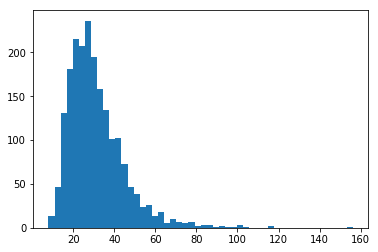

In [31]:
plt.hist(counties_data['Crude Rate'], bins=50)

(array([1.83e+03, 9.80e+01, 3.80e+01, 2.30e+01, 1.00e+01, 6.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.0044 , 0.11755, 0.2307 , 0.34385, 0.457  , 0.57015, 0.6833 ,
        0.79645, 0.9096 , 1.02275, 1.1359 , 1.24905, 1.3622 , 1.47535,
        1.5885 , 1.70165, 1.8148 , 1.92795, 2.0411 , 2.15425, 2.2674 ]),
 <a list of 20 Patch objects>)

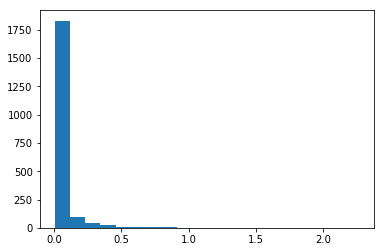

In [32]:
plt.hist(counties_data['% of Total Deaths'], bins=20)

In [33]:
counties_data.loc[(counties_data['Crude Rate'] < 6), 'risk_class'] = 'lowest_risk'
counties_data.loc[(counties_data['Crude Rate'] >= 6) & (counties_data['Crude Rate'] < 12), 'risk_class'] = 'low_risk'
counties_data.loc[(counties_data['Crude Rate'] >= 12) & (counties_data['Crude Rate'] < 28), 'risk_class'] = 'med_risk'
counties_data.loc[(counties_data['Crude Rate'] >= 28) & (counties_data['Crude Rate'] < 48), 'risk_class'] = 'high_risk'
counties_data.loc[(counties_data['Crude Rate'] >= 48), 'risk_class'] = 'highest_risk'

In [34]:
counties_data.head().T

,0,1,2,3,4
County,"Autauga County, AL","Baldwin County, AL","Bibb County, AL","Blount County, AL","Calhoun County, AL"
Deaths,47,253,27,88,132
Population,276908,1020551,112912,288981,577611
Crude Rate,16.9731,24.7905,23.9124,30.4518,22.8528
% of Total Deaths,0.0103,0.0554,0.0059,0.0193,0.0289
%_inschool_3+,13438,44265,4626,12428,27798
%_preschool_3+,3.9,6.2,3,3.9,6.2
%_kinderg_3+,7.1,4.9,4.9,4.4,5.3
%_elementary_3+,46.3,46.5,44,49.3,41.4
%_highschool_3+,24.8,24.3,28.7,25.9,20.6


# Split our Data 

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [36]:
X = counties_data.drop(columns=['risk_class','county_code','state','county',
                                'County','Deaths','Population','Crude Rate','% of Total Deaths', 
                                '%_25+', '%_inschool_3+'])
y = counties_data['risk_class']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# Modeling with XGBoost

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier

In [40]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
from sklearn.metrics import accuracy_score,f1_score

In [61]:
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_acc = accuracy_score(y_train,training_preds)
training_f1 = f1_score(y_train, training_preds, average='weighted')

test_acc = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {training_acc*100:.5f}%")
print(f"Training F1: {training_f1*100:.5f}%")
print("")
print(f"Test Accuracy: {test_acc*100:.5f}%")
print(f"Test F1: {test_f1*100:.5f}%")

Training Accuracy: 77.23325%
Training F1: 76.49252%

Test Accuracy: 63.52357%
Test F1: 61.93488%


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# GridSearchCV with XGBoostClassifier

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    "clf__learning_rate": [0.05,0.1,0.2,0.3],
    'clf__max_depth': [6,12,24],
    'clf__min_child_weight': [1,5,10],
    'clf__subsample': [0.5,0.6,0.7],
    'clf__n_estimators': [10,30,100,250],
}

In [66]:
grid_clf = GridSearchCV(XGBClassifier(),param_grid=param_grid,scoring='accuracy',cv=3,n_jobs=-1)

In [67]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__learning_rate': [0.05, 0.1, 0.2, 0.3], 'clf__max_depth': [6, 12, 24], 'clf__min_child_weight': [1, 5, 10], 'clf__subsample': [0.5, 0.6, 0.7], 'clf__n_estimators': [10, 30, 100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
grid_clf.best_params_

{'clf__learning_rate': 0.05,
 'clf__max_depth': 6,
 'clf__min_child_weight': 1,
 'clf__n_estimators': 10,
 'clf__subsample': 0.5}

In [69]:
best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
clf__learning_rate: 0.05
clf__max_depth: 6
clf__min_child_weight: 1
clf__n_estimators: 10
clf__subsample: 0.5


In [70]:
grid_training_preds = grid_clf.predict(X_train)
grid_test_preds = grid_clf.predict(X_test)

grid_training_acc = accuracy_score(y_train, grid_training_preds)
grid_training_f1 = f1_score(y_train, grid_training_preds, average='weighted')

grid_test_acc = accuracy_score(y_test, grid_test_preds)
grid_test_f1 = f1_score(y_test, grid_test_preds, average='weighted')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
print(f"Training Accuracy: {grid_training_acc*100:.5f}%")
print(f"Training F1: {grid_training_f1*100:.5f}%")
print("")
print(f"Test Accuracy: {grid_test_acc*100:.5f}%")
print(f"Test F1: {grid_test_f1*100:.5f}%")

Training Accuracy: 77.23325%
Training F1: 76.49252%

Test Accuracy: 63.52357%
Test F1: 61.93488%


In [101]:
grid_test_preds_proba = grid_clf.predict_proba(X_test)

In [104]:
grid_clf.classes_

array(['high_risk', 'highest_risk', 'low_risk', 'med_risk'], dtype=object)

In [102]:
grid_test_preds_proba

array([[0.51187044, 0.07530627, 0.00235379, 0.4104695 ],
       [0.35112926, 0.03673254, 0.00320317, 0.60893506],
       [0.2454963 , 0.06173398, 0.36837456, 0.32439515],
       ...,
       [0.02937638, 0.0098446 , 0.92860806, 0.0321709 ],
       [0.15211712, 0.00813872, 0.00547439, 0.8342698 ],
       [0.32127982, 0.01495362, 0.01090474, 0.65286183]], dtype=float32)

# Applying PCA to XGBoost

In [73]:
from sklearn.decomposition import PCA
from sklearn_pandas.pipeline import Pipeline as Pipe
from sklearn.preprocessing import StandardScaler

In [80]:
pipe = Pipe(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('xgclf', XGBClassifier())
])

In [81]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('xgclf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [82]:
training_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

training_acc = accuracy_score(y_train,training_preds)
training_f1 = f1_score(y_train, training_preds, average='weighted')

test_acc = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, average='weighted')

print(f"Training Accuracy: {training_acc*100:.5f}%")
print(f"Training F1: {training_f1*100:.5f}%")
print("")
print(f"Test Accuracy: {test_acc*100:.5f}%")
print(f"Test F1: {test_f1*100:.5f}%")

Training Accuracy: 74.87593%
Training F1: 73.89368%

Test Accuracy: 55.33499%
Test F1: 53.10778%


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.43941492, 0.14890983, 0.09483819, 0.06524277, 0.0533775 ,
       0.04550037, 0.04366669, 0.03676065, 0.02814966, 0.02006459])

In [98]:
pipe.named_steps.pca.components_[2]

array([ 0.28339324,  0.24402552,  0.29494634,  0.22506863, -0.34070646,
        0.28370563,  0.01983831, -0.23049419, -0.18662705, -0.3222759 ,
        0.22842564,  0.17311624, -0.17312295,  0.21333595,  0.38169362,
        0.1060229 ,  0.13836943])

In [94]:
X.columns

Index(['%_preschool_3+', '%_kinderg_3+', '%_elementary_3+', '%_highschool_3+',
       '%_college_3+', '%_below9th_25+', '%_9th-12th_25+', '%_hsgrad_25+',
       '%_somecollege_25+', '%_associates_25+', '%_bachelors_b25+',
       '%_gradschool_25+', '%_hsgrad_or+_25+', '%_bachelors_or+_25+',
       '%_useinternet_total_households', '%_havecomp_total_households',
       '%_broadband_total_households'],
      dtype='object')

In [95]:
sum(pipe.named_steps.pca.components_[0])

0.9738711061562662